In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\Bhavya\Downloads\Clustering and segmentation of income dataset-20241122T102130Z-001\Clustering and segmentation of income dataset\archive\Income Data.csv")

In [3]:
data.head()

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   income  300 non-null    float64
 1   age     300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


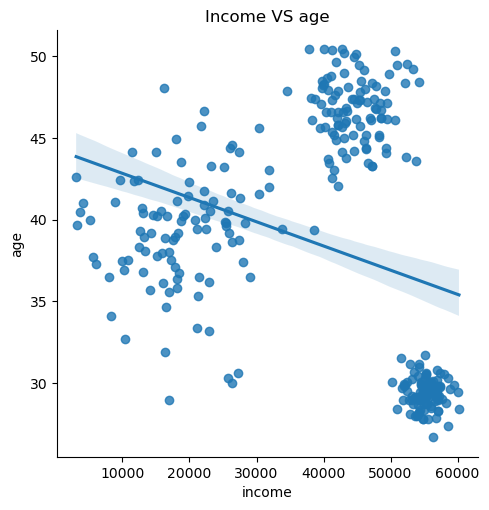

In [7]:
#### Visualizing data using line plot

sns.lmplot(x='income',y='age',data=data)
plt.title("Income VS age")
plt.show()

In [8]:
from sklearn.cluster import KMeans

In [10]:
clusters=KMeans(n_clusters=3,n_init=15,random_state=42)

In [11]:
clusters.fit(data)

KMeans(n_clusters=3, n_init=15, random_state=42)

In [14]:
data['clusterid']=clusters.labels_

In [15]:
data.head()

,income,age,clusterid
0,41100.0,48.75,0
1,54100.0,28.10,2
2,47800.0,46.75,0
3,19100.0,40.25,1
4,18200.0,35.80,1


<Figure size 600x600 with 0 Axes>

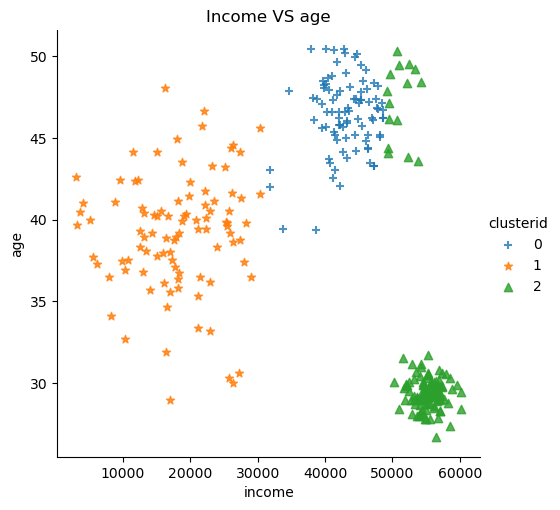

In [18]:
plt.figure(figsize=(6,6))
sns.lmplot(x='income',y='age',data=data,hue='clusterid',markers=['+','*','^'],fit_reg=False)
plt.title("Income VS age")
plt.show()

In [19]:
new_data = pd.DataFrame({"income":np.array(data['income']),
                         "age": np.array(data['age'])
                         })

In [20]:
new_data

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80
...,...,...
295,38300.0,46.10
296,27400.0,44.15
297,54200.0,28.25
298,41800.0,44.85


In [21]:
def scaling(data):
    lis = []
    for col in data.columns:
        cols = data[col].map(lambda x: (x - data[col].mean())/data[col].std())
        lis.append(cols)
        scaled_data = pd.concat([s for s in lis], axis=1)
    return scaled_data

In [25]:
scale_data=scaling(new_data)

In [26]:
# apply the clsutering again
clusters_new = KMeans(3 , random_state=42, n_init=15)
clusters_new.fit(scale_data)
scale_data['clusterid_n'] = clusters_new.labels_
clusters_new

KMeans(n_clusters=3, n_init=15, random_state=42)

<Figure size 600x600 with 0 Axes>

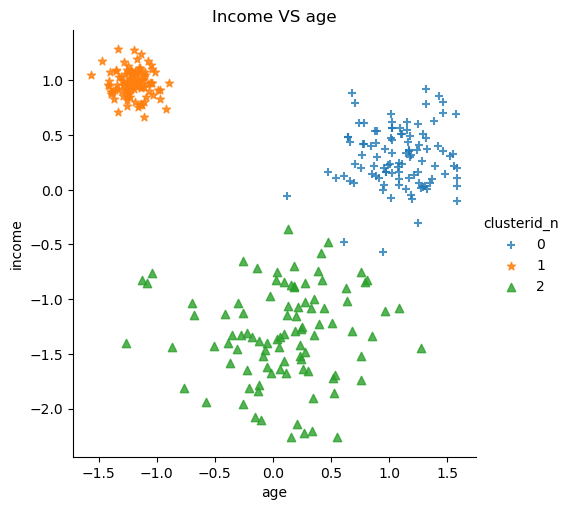

In [28]:
plt.figure(figsize=(6,6))
sns.lmplot(x='age', y='income', hue='clusterid_n', markers=['+','*','^'], data=scale_data, fit_reg=False)
plt.title("Income VS age")
plt.show()

In [33]:
# using groupby method to know what is the meaning of clusters
data.groupby("clusterid")[['age','income']].agg(['mean', 'std']).reset_index()

clusterid        age                  income             
                  mean       std          mean          std
0         0  46.419101  2.289620  43053.932584  3613.769632
1         1  39.174479  3.626068  18144.791667  6745.241906
2         2  31.700435  6.122122  54675.652174  2362.224320